In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
df = pd.read_csv('drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [91]:
df.describe()

,Age,Na_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [92]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_K           0
Drug           0
dtype: int64

In [93]:
for i in df.columns:
    print(i,df[i].unique())

Age [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Na_K [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.294 

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_K         200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


VARIABLE ANALYSIS

C:\Users\HRISHITHA\AppData\Local\Temp\ipykernel_22576\2708624847.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


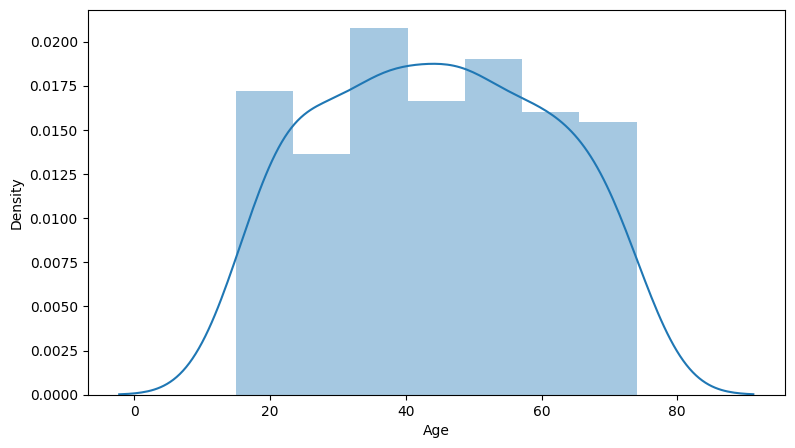

In [137]:
# Distribution Of Age Variable

plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

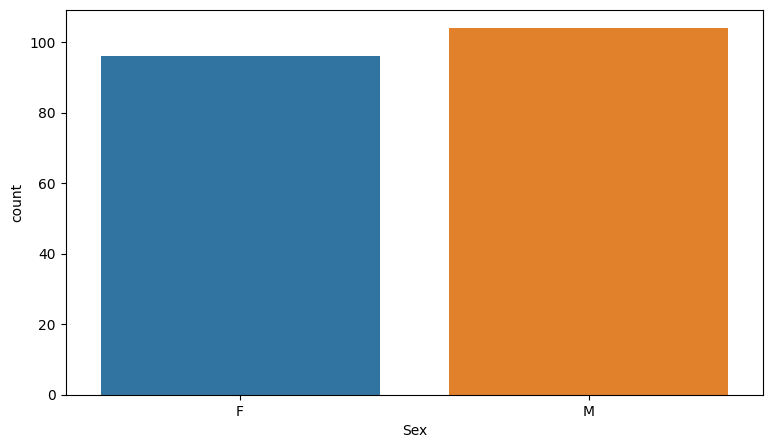

In [96]:
# Univariate Distribution Of Sex Variable

plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

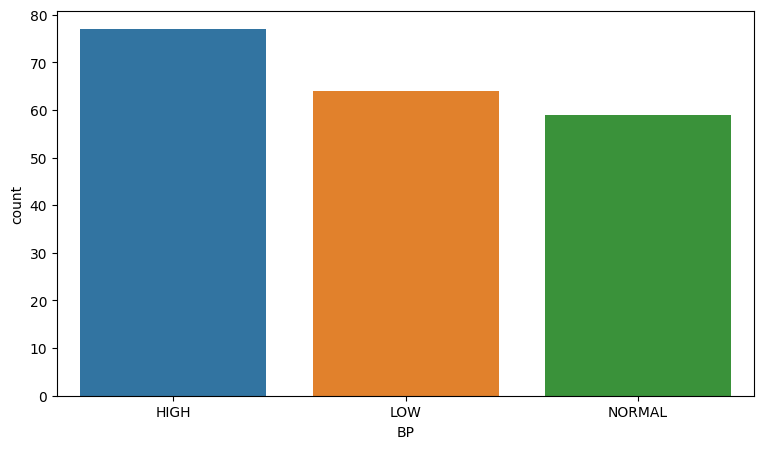

In [97]:
# Count Of BP Variable

plt.figure(figsize=(9,5))
sns.countplot(x = df.BP)
plt.show()

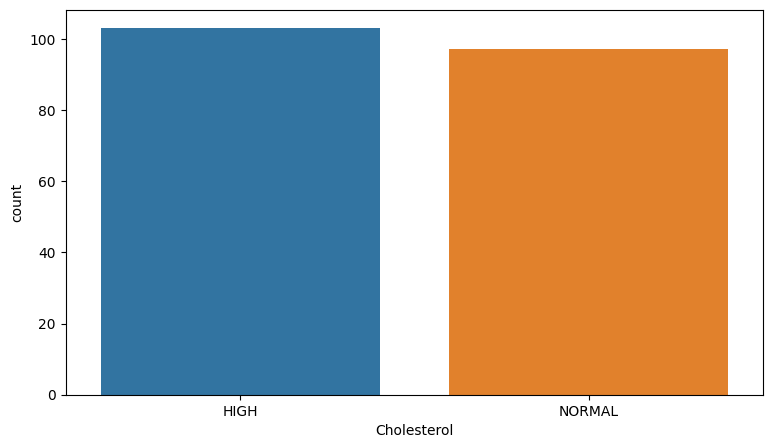

In [98]:
# Count Of Cholesterol Variable

plt.figure(figsize=(9,5))
sns.countplot(x = df.Cholesterol)
plt.show()

C:\Users\HRISHITHA\AppData\Local\Temp\ipykernel_22576\3526972867.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Na_K)


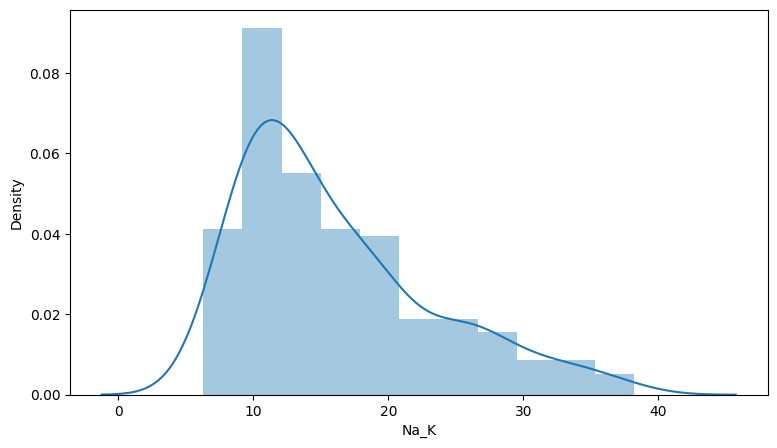

In [106]:
# Distribution Of Na_K Variable

plt.figure(figsize=(9,5))
sns.distplot(df.Na_K)
plt.show()

# Drug --- Age

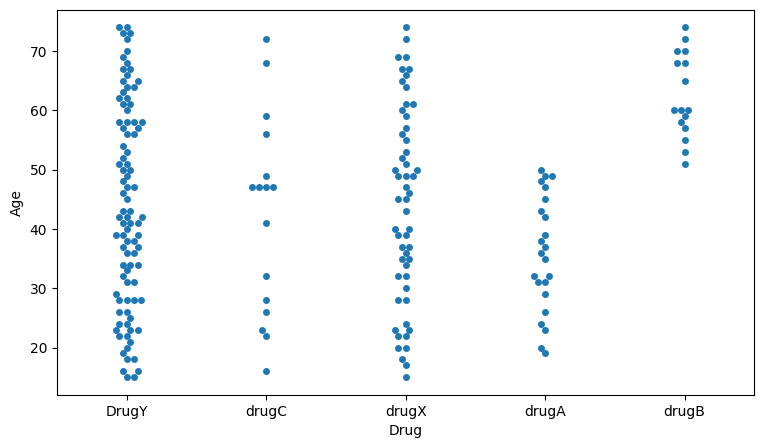

In [118]:
plt.figure(figsize=(9,5))
sns.swarmplot(x = 'Drug',y = 'Age',data=df)
plt.show()

In [141]:
print("Minimum Age of Drug-B : ",df.Age[df['Drug']=='drugB'].min())
print("Minimum Age of Drug-A : ",df.Age[df['Drug']=='drugA'].max())

Minimum Age of Drug-B :  51
Minimum Age of Drug-A :  50


Drug B starts from Age 51 and 
Drug A ends at Age 50

# Drug --- Sex

In [122]:
# Grouping and counting the values wrt Sex and Drug

df_sex_drug = df.groupby(['Drug','Sex']).size().reset_index(name='Count')
df_sex_drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


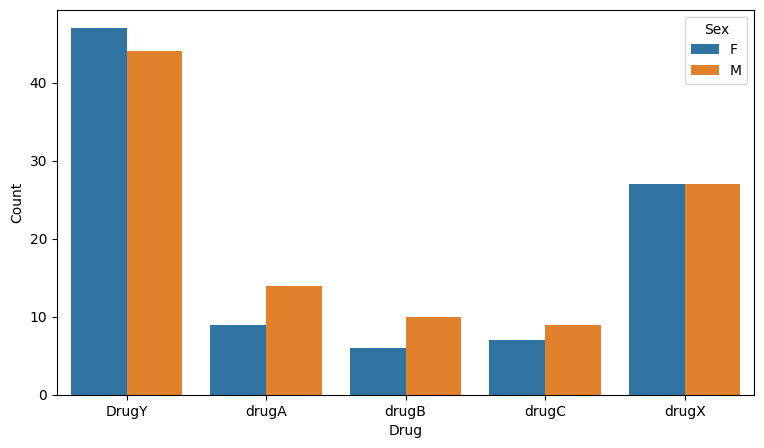

In [127]:
plt.figure(figsize=(9,5))
sns.barplot(x='Drug',y ='Count',hue='Sex',data = df_sex_drug)
plt.show()

Men Consume more Drug A,Drug B, Drug C than women. 
Women get more Drug Y than Men. 
Drug X balanced

# We can say Sex is not that influential for consideration

# Drug --- BP

In [128]:
# Grouping and counting the values wrt Bp and Drug

df_bp_drug = df.groupby(['Drug','BP']).size().reset_index(name='Count')
df_bp_drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


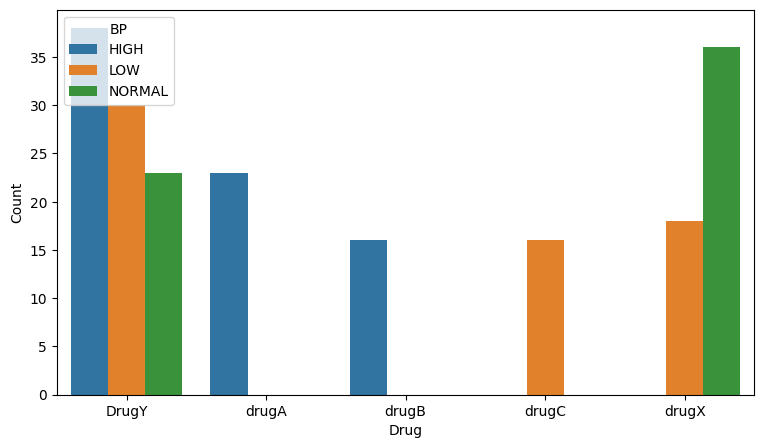

In [129]:
plt.figure(figsize=(9,5))
sns.barplot(x='Drug',y ='Count',hue='BP',data = df_bp_drug)
plt.show()

Drug A and B consumed by only High BP people. Drug C only Low BP. Drug X mostly High BP. 
# BP not Good for Classification

# Drug --- Na_K

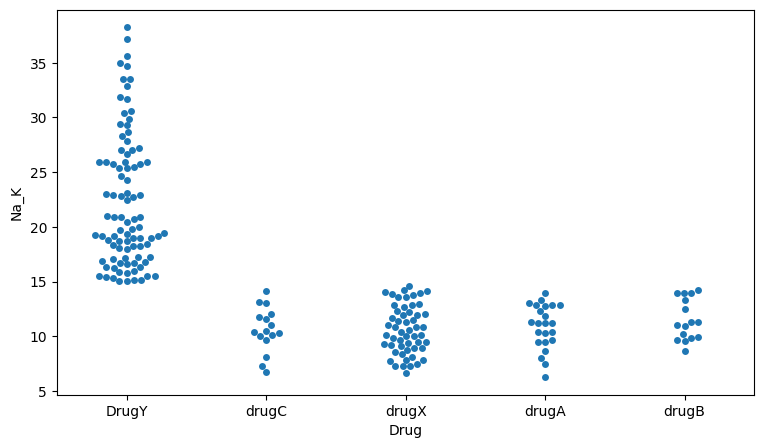

In [132]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_K",data = df)
plt.show()

In [143]:
print("Minimum Na_to_K for DrugY:",df.Na_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


Drug Y starts from age 15

# Drug --- Cholesterol

In [133]:
# Grouping and counting the values wrt Cholesterol and Drug

df_Cholesterol_drug = df.groupby(['Drug','Cholesterol']).size().reset_index(name='Count')
df_Cholesterol_drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


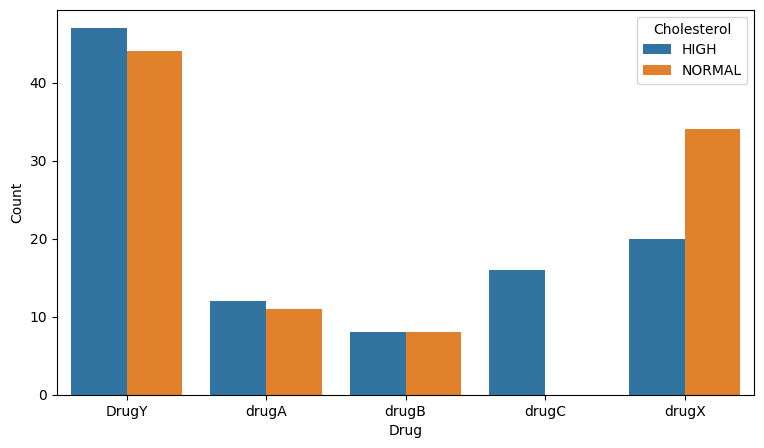

In [134]:
plt.figure(figsize=(9,5))
sns.barplot(x='Drug',y ='Count',hue='Cholesterol',data = df_Cholesterol_drug)
plt.show()

Drug C only High Cholesterol. 
# Cholesterol is important for Drug C

# Na_k --- BP --- Drug

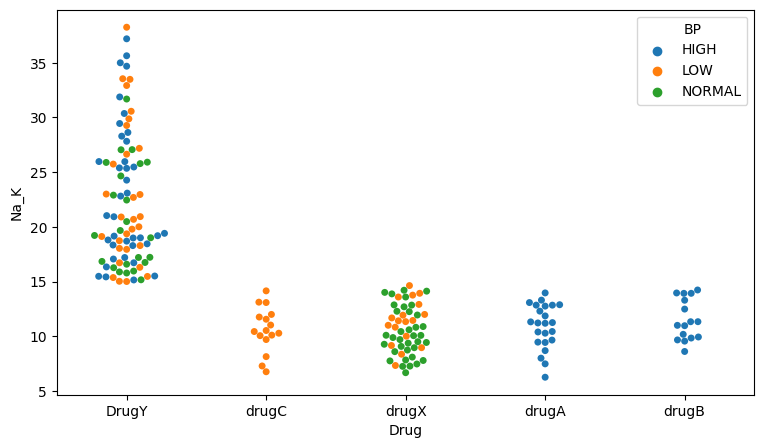

In [136]:
plt.figure(figsize=(9,5))
sns.swarmplot(x='Drug',y ='Na_K',hue='BP',data = df)
plt.show()